In [96]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
# import statsmodels.graphics.gofplots as sm
import scipy
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In this tutorial we'll look at how to how to generate qq plots, how to calculate calculate cumulative areas under the curve for both the normal and t-distributions (as well as the inverse functions), and look at confidence intervals and one-sample hypothesis testing for means.   

# Q-Q plots
In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

Technically, we are using a probability plot here to graphically estimate the quantiles of a dataset against a comparison distribution that is a standard normal distribution (this is the default for he sm.qqlot call). 

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x (the diagnoal line). Comparing a dataset against the theoretical normal distribution, the points should follow an approximaely straight line with departures indicating departures from normality.  

# Testing for normally distributed data with Q-Q plots

In general we need to test that our data are normally distributed to onfidently use parametric statitics for interval estmation and hypothesis testing. We learned that a good way to do that was via qq plots, where we will compare the distribution of the dataset of interest with a normal distribution.  

Let's simulate some normal data (mean=10, std=2) to represent the dataset that we are interested in and compare it aganst a theoretical normal distribution.  

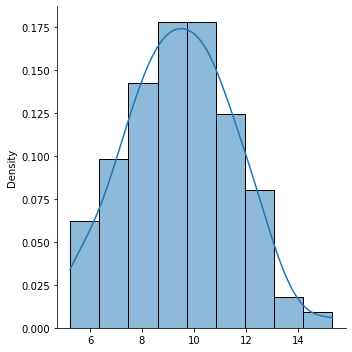

In [97]:
# simulated data
normal_random_variables=norm.rvs(10,2,size=100)
ax=sns.displot(normal_random_variables,kde=True,stat='density')

mean_sample=np.mean(normal_random_variables)
std_sample=np.std(normal_random_variables,ddof=1)

In [98]:
# We have taken a sample of 100 from a normal distribution of mean=10 and standard deviation=2
print(mean_sample)
print(std_sample)

9.475892284709023
2.043934450603819


Let's plot this data on a qq plot. The method to plot the qq plots also takes `loc` and `scale` as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter `line='45'` plots the y=x line on the same plot.

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


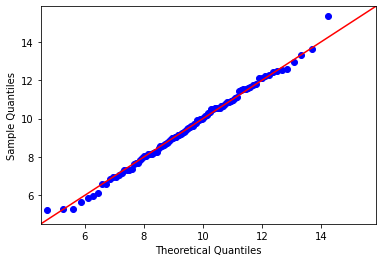

In [99]:
normal_random_variables.sort()
sm.qqplot(normal_random_variables,line='45',loc=mean_sample,scale=std_sample)
plt.show()

As expected the sample data and the theoretical data match up pretty well. They don't match up perfectly. You can see this by ading a 95% condificence interval for the qq plot.

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

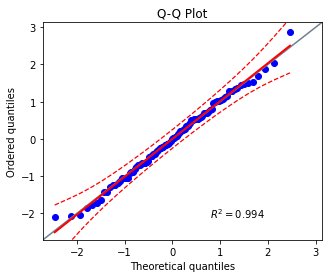

In [100]:
# we will import the python package pingouin to access some of it's exhaustive statistcial functions, but this is  for demo purposes
# qq plot showing 95% condifence interval of the best-fit line.
# This qq plot is comparing our simulated dataset to the theoretical standard normal distribution. 
# This provides a way to assess the "goodness of fit" here as well, by ploting the regression line (the best fit line)
# and providing the coefficient of determinaton to quantify this goodness of fit.
import pingouin as pg
pg.qqplot(normal_random_variables,dist='norm')

The qq plot here is simply plottng the normalized ordered quantiles of the sample (on the y axis) against the theoretical quantiles defined by the standard normal distribution.  Remember that the quantiles of of a dataset can be found using the ppf function in the scipy package, so you can impliment your own function to create a simple q-q plot.

Typicall you would just call on the builtin function of scipy (stats.probplot) or stats model qqplot (sm.qqplot) to do this for you.

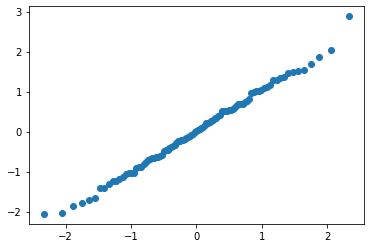

In [101]:
def my_own_qqplot(data,distribution):
    n=len(data)
    z=((data-np.mean(data))/np.std(data))
    quantiles= [distribution.ppf(i/n) for i in range(0,n)]
    plt.plot(quantiles,sorted(z),'o')
    
my_own_qqplot(normal_random_variables,norm)

# Statstical tests of normality

Using qq plots are the best way and most accepted way to judge normality, but the determiniations are subjective and take some getting use to. Beside the critical evalutaion of the qq plot, you can also look at the assumption of normality frst by running a Shapiro-Wilk test.  This tests if the sample data is well-modelled by a normal distribution and computes how likely it is for a random variable underlying the data set to be normally distributed.

In [102]:
stats.shapiro(normal_random_variables)

ShapiroResult(statistic=0.992956280708313, pvalue=0.8854073286056519)

We are looking forward to when we discuss hypotheiss testing, but here the larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is normally distributed) and conclude that the sample is indeed from a normal distribution.  So this p-value (greater than 0.05) means that we *accept* that the level of proof testing the null hypothesis is not unlikely (that we fail to reject the null hypothesis).  Since it is not unlikely, we do not reject the null and therfore do not support the alternative that the popuation does not have a normal distribution.  

# Standard errors are used to compute Confidence Intervals

The standard error of the mean is a measure of the precision of the estimate of the mean from a sample of the true mean of the population.  The SEM is the stanadrd deviaton of the sampling distribution of the sample means.  SEM= $\sigma$ / $\sqrt{n}$.  You use the standard error of the mean in the computation of the confidence interval of the mean.

The confidence interval of the mean is the range of the estimate of the unknown mean, bounded by the lower bound and upper bound of the range and computed at a designated confidence level (often at a 95% confidence level).  The confidence interval for the true mean is: 

$\bar{x} - \frac{c_n*\sigma}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_n*\sigma}{\sqrt(n)}$.

where $\bar{x}$ is the sample mean \
where $c_n$ is the critical value of z using the standard normal probability distribution at a certain confidence level \
where $\sigma$ is the known population standard deviation \
where n is the sample size 

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling distribution of the samples means from any distritbution to be normally approximated, at a sufficiently large sample size).

# Confidence Interval for Mean of One Sample and Known Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.   We will imagine a situation where we do not know the mean of the population but we do know the standard deviation of the population, $\sigma$=1.2.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$.  

In [103]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
mean_BP

101.81666666666666

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


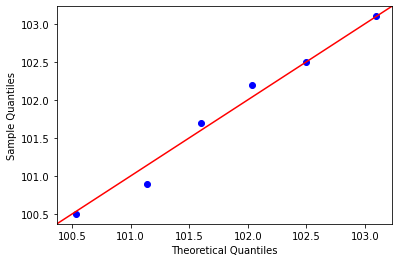

In [104]:
# let's first look at the distirbution of the data
sm.qqplot(data_BP,line='45',loc=mean_BP,scale=1.2)
plt.show()

If the population dsitribution is normal or the sample size is sufficiently large, then can use the critical z value \
The mean of the sampling distribution of the mean is equal to the population mean \
The standard error of the mean is equal to the $\sigma$ / ${\sqrt(n)}$

In [105]:
# standard deviation = 1.2
SEM_BP=1.2/np.sqrt(6)
SEM_BP

0.48989794855663565

The selection of the CI determines the probability that the CI will contain the true mean value.  A common choice for the confidence level is 95%.  This is 0.95 probability of the area under the normal probability density curve covered or accounted for.  Probability areas outside of this area are less than 0.05.  Becasue the normal curve is symetric, half of this probability is on the lower tail and half on the upper tail. For a confidence interval of confidence level of C, the area in each tail is equal to (1-C)/2.

In [106]:
print(norm.ppf(0.025))
print(norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

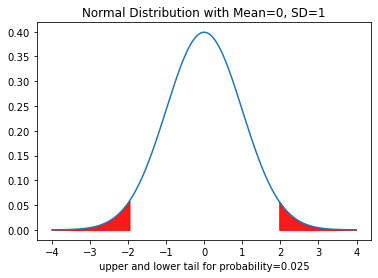

In [107]:
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax=sns.lineplot(x=x_A,y=normal_A)
ax=plt.fill_between(x_A,normal_A, where=(x_A <-1.96),color='r',alpha=.9)
ax=plt.fill_between(x_A,normal_A, where=(x_A >1.96),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("Normal Distribution with Mean=0, SD=1")

The critical value from the standard normal distribution is the z value realizing the probability of observing a value at least as extreme as positive z, or the upper critical value.  For p=0.025, the upper critical z value such that P(Z>$/z_c$)=0.025 = 1.96.

In [108]:
# 95% CI calculation
# lower bound
print(mean_BP - 1.96 * 1.2/np.sqrt(6))
# upper bound
print(mean_BP + 1.96 * 1.2/np.sqrt(6))

100.85646668749565
102.77686664583767


In [109]:
import statsmodels as sm
# statsmodels.stats.weightstats._zconfint_generic(mean,std_mean(standard error),alpha,alternative)
CI_BPz=sm.stats.weightstats._zconfint_generic(mean_BP,1.2/np.sqrt(6),0.05,alternative='two-sided')
CI_BPz

(100.8564843313956, 102.77684900193772)

In [131]:
norm.ppf(0.975,loc=mean_BP, scale=1.2/np.sqrt(6))

102.77684900193772

In [132]:
norm.ppf(0.025,loc=mean_BP, scale=1.2/np.sqrt(6))

100.8564843313956

# Confidence Interval for Mean of One Sample and Unknown Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius. We now do not know the population mean or standard deviation, and so will estimate the from the sample.

We will calculate the 95% confidence intervals for the true mean using our sampled data. In cases where we want to estimate the true population mean and are estimating the standard deviation using the sample standard deviation we have to use the t-distribution to calculate our confidence intervals.

The confidence interval for the true mean is for unknown standard deviation: \
$\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.

where $\bar{x}$ is the sample mean \
where $c_t$ is the critical value of t using the t probability distribution at a certain confidence level \
where s is the sample standrd deviation \
where n is the sample size 

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling dstribution of the samples means from any dsirtbution to be normally approximated, at a sufficiently large sample size).

The t-distribution is described by the degrees of freedom. For a sample of size n, the t distribution will have n-1 degrees of freedom.  As sample size increases and the dof increase, the t distribution becomes approximately normal.

Let's look back at our simulated normal data. We allready calcualted $\bar{x}$ and $s$ and we took 100 samples so $n=100$. That also means that we have 99 degrees of freedom. Let's first calculate the $c_t$ values. This can be done using the [scipy.stats t library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Note that you CAN NOT specify `loc` and `scale` for the t-distribution because it only has one parameter, the degrees of freedom (DF).

In [110]:
# We have taken a sample of 100 from a normal distribution of mean=10 and standard deviation=2
print(mean_sample)
print(std_sample)

9.475892284709023
2.043934450603819


In [128]:
from scipy.stats import t
ct = t.ppf(0.975,df=99)
print(ct)
LB = mean_sample-ct*std_sample/np.sqrt(100)
UB = mean_sample+ct*std_sample/np.sqrt(100)
print(str(LB) + " <= true mean= <= " +str(UB))

1.9842169515086827
9.070331346242954 <= true mean= <= 9.881453223175091


In [133]:
ct=t.ppf(0.975,df=99,loc=9.47589,scale=(2.043934/np.sqrt(100)))
print(ct)

9.881450849056495


In [112]:
# statsmodels.stats.weightstats._tconfint_generic(mean,std_mean(standard error),dof,alpha,alternative)
CI_t=sm.stats.weightstats._tconfint_generic(mean_sample,std_sample/np.sqrt(100),99,0.05,alternative='two-sided')
CI_t

(9.070331346242954, 9.881453223175091)

Text(0.5, 1.0, 't Distribution with dof=99')

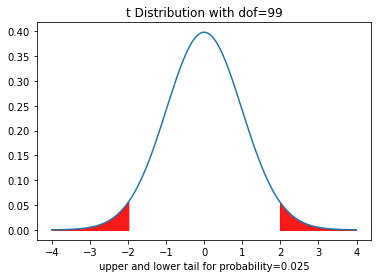

In [113]:
x_B = np.arange(-4,4,.01)
t_B=t.pdf(x_B,99)
ax=sns.lineplot(x=x_B,y=t_B)
ax=plt.fill_between(x_B,t_B, where=(x_B <-1.984),color='r',alpha=.9)
ax=plt.fill_between(x_B,t_B, where=(x_B >1.984),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("t Distribution with dof=99")

As we can see the 95% confidence interval we generated using our sample does (probably) contain the true mean of 10. Since we are calculating a 95% confidence interval, if we were to repeat this process 20 times and calculate the confidence intervals for all of those times, we would expect 19 of the confidence interval ranges to contain the true mean of 10.  Or 0.05 * 20=1 on average would be intervals not covering the true mean).

# Boiling point example
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.  We do not know the mean of the population and we do not know the standard deviation of the population, $\sigma$=unknown.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$ and the sample standard devation = s.

In [114]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
print(mean_BP)
std_BP=np.std(data_BP,ddof=1)
print(std_BP)

101.81666666666666
0.9847165412780786


In [115]:
from scipy.stats import t
ct = t.ppf(0.975,df=5)
print(ct)
LB = mean_BP-ct*std_BP/np.sqrt(6)
UB = mean_BP+ct*std_BP/np.sqrt(6)
print(str(LB) + " <= true mean= <= " +str(UB))

2.5705818366147395
100.78327003266101 <= true mean= <= 102.85006330067232


In [116]:
CI_t=sm.stats.weightstats._tconfint_generic(mean_BP,std_BP/np.sqrt(6),5,0.05,alternative='two-sided')
CI_t

(100.78327003266101, 102.85006330067232)

# Standard errors are used to compute Confidence Intervals and p-values for hypothesis testing

Example:  You take a sample of size 20 from a school and they form a study gruop.  You want to test if the study group received a different score on a test than the rest of the grade.  The average from test 1 for  the school is 67.5. Assume that student scores are normally distributed.  

In [117]:
dataA=np.array([50,60,60,64,66,66,67,69,70,74,76,76,77,79,79,79,81,82,82,89])
stats.describe(dataA)

DescribeResult(nobs=20, minmax=(50, 89), mean=72.3, variance=90.6421052631579, skewness=-0.48973181655041464, kurtosis=-0.23505442484092365)

In [118]:
np.sqrt(90.642)

9.52060922420409

In [119]:
# making sure that the standard deviation is that for the sample = s
np.std(dataA,ddof=1)

9.520614752375915

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


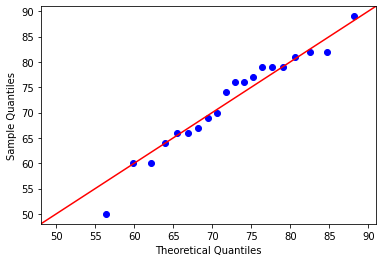

In [120]:
# examine the data to ensure normality assumption is confirmed, since we haev a lower sample size
import statsmodels.api as sm
sm.qqplot(dataA,line='45',loc=72.3,scale=np.sqrt(90.642))
plt.show()

One-sample t-test for the mean of a normal distribution with an unknown variance \
Checklist for hypothesis testing 
1. Exmanine the data
2. Formulate null and alternate hypothesis
3. Choose significance level
4. Calculate test statistic
5. Compare the test statistic with critical value or find probability of test statistic
6. Reject the null hypothisis or not

Null hypothesis \
$H_0: \mu = \mu_0$ \
$H_A: \mu \neq \mu_0$

$\alpha = 0.05$ or 95% confidnece level

t test statistic = t = $\frac{(\bar{x} - \mu_0)}{s\sqrt(n)}$ \
t value at df=n-1 and probability = 1 - $\alpha$/2

# For our example
$\mu_0$ = mean of the class = 67.5 \
$\bar{x}$ = sample mean of the study group =72.3 \
s = 9.52 \
n=20 \
$H_0: \mu = \mu_0$ 
Two-side hypothesis test since we are asking if the popultation means are different or not; could be greater or could be less than each other, just $H_A: \mu \neq \mu_0$

In [121]:
t_SG = (72.3-67.5)/(9.52/np.sqrt(20))
t_SG

2.254858464705669

In [122]:
# critical value of t with df=19 and at 1-0.050/2=0.975
t.ppf(0.975,19)

2.093024054408263

Text(0.5, 1.0, 't Distribution with dof=19')

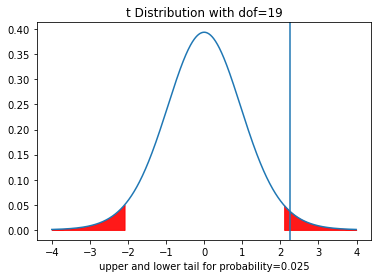

In [123]:
# we can look at the t-dstribution at dof=n-1=19 and see where the regection regions are (in red below)
# The blue vertical line is the t statistic that we calculated
x_C = np.arange(-4,4,.01)
t_C=t.pdf(x_B,19)
ax=sns.lineplot(x=x_C,y=t_C)
ax=plt.fill_between(x_C,t_C, where=(x_C <-2.09),color='r',alpha=.9)
ax=plt.fill_between(x_C,t_C, where=(x_C >2.09),color='r',alpha=.9)
ax=plt.axvline(2.255,0,4)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("t Distribution with dof=19")

to find the probability of finding this test statisctic or one mroe extreme, assuming that the null hyptheiss is true, we find the probability at this test statistic = the level of statitsical significance = the p-value

In [124]:
1-t.cdf(2.25,19)

0.018246669314484154

In [125]:
# this is the probability for 1 tail of the distribution, for both tails we need to double this
2*(1-t.cdf(2.25,19))

0.03649333862896831

Or use SciPy stats to run the 1 sample t-test

In [126]:
scipy.stats.ttest_1samp(dataA,67.5,alternative='two-sided')

Ttest_1sampResult(statistic=2.25471286700693, pvalue=0.03614521878144544)

Since the p-value here is less than our alpha level=0.05 at a 95% confidence level, then we reject the null hypothesis.  The null hypothesis is that the population mean that is estimated by the sample is the same as the mean from which the sample was taken. \

There is a statistically significant differenece between these means, since our p-value of 0.03 is less than alpha=0.05.. The hypothesis test evidence supports the alternative hypothesis and we therfore accept the alternative hypotheisis.  There is a 3% chance of fidning a difference as large or larger than the one found in this study, GIVEN THAT THE NULL HYPOTHESIS IS TRUE.  Since this is a small chance, smaller than that specified as 5%, we accept the alternative hypothesis.  

# Support your p-value using confidence intervals. 

In [127]:
import statsmodels as sm
CI_tA=sm.stats.weightstats._tconfint_generic(72.3,9.52/np.sqrt(20),19,0.05,alternative='two-sided')
CI_tA

(67.84450285088246, 76.75549714911753)

With a mean grade of 72.3, the study group scored higher than the average class grade of 67.5 for the test (${t_{19}}$ = 2.25, p=0.036, $\alpha$=0.05, the 95% confidnece interval is [67.8-76.8]). 